# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import io
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
df_twi_arch_enh=pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tweet_im_preInter=requests.get(url).content
df_tweet_img_pre=pd.read_csv(io.StringIO(tweet_im_preInter.decode('utf-8')), sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
tweet_list = []

# Read the .txt file line by line into a list of dictionaries
for json_line in open('tweet-json.txt', 'r'):
    all_twitter_data = json.loads(json_line)
    tweet_list.append({'tweet_id': all_twitter_data['id_str'],
                        'retweet_total': all_twitter_data['retweet_count'],
                        'favorite_total': all_twitter_data['favorite_count'],
                        'followers_total': all_twitter_data['user']['followers_count']})
df_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_total', 'favorite_total', 'followers_total'])

## Assessing Data

**1.visual assessment**

In [5]:
df_twi_arch_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_tweet_img_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
df_tweet

,tweet_id,retweet_total,favorite_total,followers_total
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


**Quality issues of visual assessment**

 - From table **df_twi_arch_enh:**
* Some variables have null value: **in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**
* Some name value can make confusion and can note be the name of dog: **'a', 'an'**
* source colomn is in HTML type 

 - frome table **df_tweet_img_pre:**
  * the value of variables p1, p2, p3 begin some time with lowers letter and auther time with upers letter

**2. programmatic assessment**

In [8]:
df_twi_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_twi_arch_enh.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
df_twi_arch_enh.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
df_twi_arch_enh.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Daisy          7
Buddy          7
Toby           7
an             7
Dave           6
Milo           6
Koda           6
Oscar          6
Jack           6
Stanley        6
Leo            6
Rusty          6
Bella          6
Jax            6
Scout          6
Sunny          5
            ... 
Orion          1
Flurpson       1
Tupawc         1
Clarkus        1
Brady          1
Brandi         1
Sprinkles      1
Sweets         1
Laika          1
Tycho          1
Randall        1
Cedrick        1
Leonard        1
Cermet         1
Butters        1
Brudge         1
Tessa          1
Bronte         1
Craig          1
Maya           1
Venti          1
Sonny          1
Tripp          1
Tanner         1
Edmund         1
Brownie        1
Milky          1
Keet          

In [12]:
df_tweet_img_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_total      2354 non-null int64
favorite_total     2354 non-null int64
followers_total    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


**Quality issues from programming asseeement**

- Frome table **df_twi_arch_enh:**
  * Keep original ratings (no retweets) with images
  * drop columns not needed for our analysis
  * Erroneous datatype in columns:**tweet_id,timestamp**
  * null values in **expanded_urls**
  * some values in columns: **rating_numerator,rating_denominator** are incoherents values

- Frome table **df_tweet_img_pre:**
 * Erroneous datatype in columns:**tweet_id**

### Tidiness issues
1. In df_twi_arch_enh, colomns: **doggo,	floofer,	pupper,	puppo** should be merge in one colomns **stage_dog**

2. **df_tweet_img_pre** should be merge with **with In df_twi_arch_enh**
3. **df_tweet** should be merge with **with In df_twi_arch_enh**

## Cleaning Data

In [14]:
# Make copies of original pieces of data
df_archiv_clean=df_twi_arch_enh.copy()
df_imag_pre_clean=df_tweet_img_pre.copy()
df_tweetter_data_clean=df_tweet.copy()


### Issue 1: erroneous data type

#### Define: fixe datat type problem

#### Code

In [15]:
# convert to str type tweet_id of df_archiv_clean,df_imag_pre_clean,df_tweetter_data_clean
df_archiv_clean.tweet_id=df_archiv_clean.tweet_id.astype(str)
df_imag_pre_clean.tweet_id=df_imag_pre_clean.tweet_id.astype(str)
# convert timestamp to datetime frome df_archiv_clean
df_archiv_clean.timestamp= pd.to_datetime(df_archiv_clean.timestamp)

#### Test

In [16]:
df_archiv_clean.tweet_id.dtypes,df_imag_pre_clean.tweet_id.dtypes,df_archiv_clean.timestamp.dtypes

(dtype('O'), dtype('O'), dtype('<M8[ns]'))

#### Issue 2 : Keep original ratings (no retweets) with images

#### Define: Delete retweets by filtering the NaN of retweeted_status_user_id

#### Code

In [17]:
df_archiv_clean = df_archiv_clean[pd.isnull(df_archiv_clean.retweeted_status_user_id)]

#### Test

In [18]:
sum(df_archiv_clean.retweeted_status_user_id.value_counts())

0

### Issue 3: Incorrect dog name

#### Define chante all incorrect name to None

#### Code

In [19]:
df_archiv_clean['name'][df_archiv_clean['name'].str.match('[a-z]+')] = 'None'

#### Test

In [20]:
df_archiv_clean.name.value_counts()

None        784
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Bo            6
Oscar         6
Stanley       6
Bella         6
Koda          6
Bailey        6
Jax           6
Dave          5
Bentley       5
Rusty         5
Leo           5
Louis         5
Milo          5
Scout         5
Buddy         5
Chester       5
Cassie        4
Chip          4
           ... 
Philbert      1
Ron           1
Jonah         1
Iroh          1
Josep         1
Shelby        1
Devón         1
Tuck          1
Gert          1
Yukon         1
Dallas        1
Ralpher       1
Stormy        1
Kevon         1
Lilly         1
Tug           1
Fido          1
Marvin        1
Barney        1
Kollin        1
Juckson       1
Ace           1
Monkey        1
Trip          1
Amber         1
Yoda          1
Fizz          1
Clifford      1
Logan         1
Tino          1
Name: name, Length: 931,

### Issue 4: mess in variable names p1, p2, p3 of df_imag_pre_clean

#### Define: write values of p1, p2 p3 in lower letter

#### Code

In [21]:
df_imag_pre_clean.p1 =df_imag_pre_clean.p1.str.lower()
df_imag_pre_clean.p2 = df_imag_pre_clean.p2.str.lower()
df_imag_pre_clean.p3 = df_imag_pre_clean.p3.str.lower()

#### Test

In [22]:
df_imag_pre_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue 5: bad rating

#### Define: correct the bad rating in df_archiv_clean

#### code

In [23]:

df_archiv_clean.reset_index(inplace=True, drop=True)
with pd.option_context('max_colwidth', 300):
    display(df_archiv_clean[df_archiv_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
           [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1510,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [24]:
# convert to float datatype rating_numerator and rating_denominator
df_archiv_clean.rating_numerator = df_archiv_clean.rating_numerator.astype(float)
df_archiv_clean.rating_denominator = df_archiv_clean.rating_denominator.astype(float)

#update values of incorrect rating_numerator
df_archiv_clean.loc[45, 'rating_numerator'] = 13.5
df_archiv_clean.loc[340, 'rating_numerator'] = 9.75
df_archiv_clean.loc[695, 'rating_numerator'] = 9.75
df_archiv_clean.loc[763, 'rating_numerator'] = 11.27
df_archiv_clean.loc[1689, 'rating_numerator'] = 9.5
df_archiv_clean.loc[1712, 'rating_numerator'] = 11.26

#### Test

In [25]:
with pd.option_context('max_colwidth', 300):
    display(df_archiv_clean[df_archiv_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1510,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


### Issue 6: dog with multiple stage 

#### Define: create a new colomns stage_dog witch take type of dog from text drop doggo,floofer,pupper,puppo

#### code

In [26]:
# Extract the text from the columns into the new stage_dog colunn
df_archiv_clean['stage_dog'] = df_archiv_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
# drop columns
df_archiv_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


#####  Test

In [27]:
df_archiv_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


#### Issue 7 : unused colomns for analysis

#### Define: Drop unused colomns

#### code

In [28]:

df_archiv_clean = df_archiv_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

#### Test

In [29]:
df_archiv_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo


### Issue 8: source colomn is in HTML type 

#### Define: extract from HTML type a string type of source


#### Code

In [30]:
df_archiv_clean.source = df_archiv_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [31]:
df_archiv_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Isuue 9: Merge 


#### Define: merging all dataset

#### Code

In [32]:
# merge df_archiv_clean and df_imag_pre_clean to merge1
merge1 = df_archiv_clean.join(df_imag_pre_clean.set_index('tweet_id'), on='tweet_id')
# merge df_tweetter_data_clean and merge1 to df_merge
df_merge = merge1.join(df_tweetter_data_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [33]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage_dog             364 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_total         2175 non-null int64
favorite_total       

#### Test

In [34]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage_dog             364 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_total         2175 non-null int64
favorite_total       

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [35]:
df_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


## A- Insights

### 1- the correlation between favorite and retweet ?

In [36]:
df_merge['favorite_total'].corr(df_merge['retweet_total'])

0.91173165335641071

there are positive and strong correlation between favorite and retweet

### 2- musch popular dog name ?

In [37]:
df_merge.name.value_counts()

None        784
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Bo            6
Oscar         6
Stanley       6
Bella         6
Koda          6
Bailey        6
Jax           6
Dave          5
Bentley       5
Rusty         5
Leo           5
Louis         5
Milo          5
Scout         5
Buddy         5
Chester       5
Cassie        4
Chip          4
           ... 
Philbert      1
Ron           1
Jonah         1
Iroh          1
Josep         1
Shelby        1
Devón         1
Tuck          1
Gert          1
Yukon         1
Dallas        1
Ralpher       1
Stormy        1
Kevon         1
Lilly         1
Tug           1
Fido          1
Marvin        1
Barney        1
Kollin        1
Juckson       1
Ace           1
Monkey        1
Trip          1
Amber         1
Yoda          1
Fizz          1
Clifford      1
Logan         1
Tino          1
Name: name, Length: 931,

the musch popular dog name is charlie with 12 occurence 

### 3- musch popular image sources ?

In [38]:
df_merge.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

The musch popular source of image is Twitter for iPhone witch 2221 occurrences

## B- Visualization

#### retweet variation over time

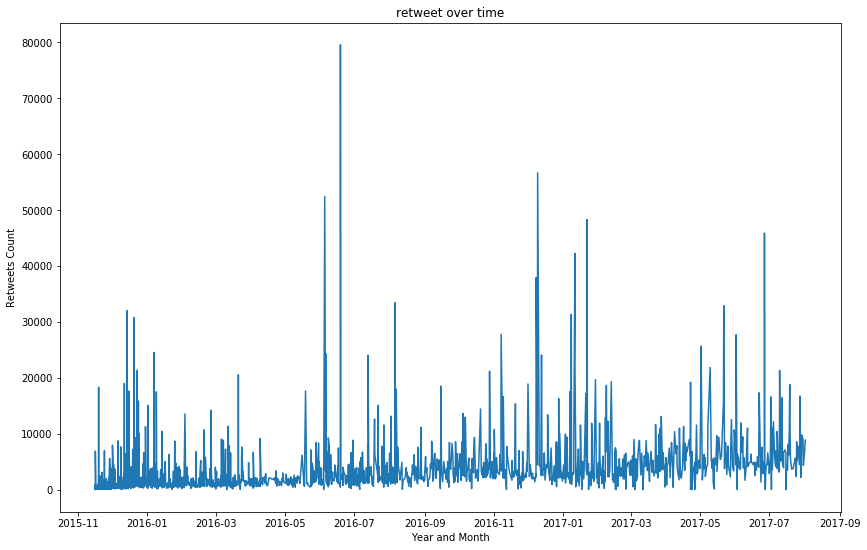

In [39]:
plt.figure(figsize=(14, 9));
plt.xlabel('Year and Month');
plt.ylabel('Retweets Count');
plt.plot(df_merge.timestamp, df_merge.retweet_total );
plt.title('retweet over time');

We note the strong retweet between 05-2016 and 07-2016